In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\marty\AppData\Local\Temp\ipykernel_7596\2853156303.py:12: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data = pd.read_csv("../data/train_data_preprocessed.csv")

In [4]:
X = data.drop(['smoking'], axis = 1)
y = data['smoking']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "K-Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"{name} Model")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print(f"ROC AUC Score: {roc_auc}")
    print("-" * 50)

Decision Tree Model
Accuracy: 0.701725181598063
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74     22677
           1       0.65      0.64      0.65     16971

    accuracy                           0.70     39648
   macro avg       0.70      0.69      0.69     39648
weighted avg       0.70      0.70      0.70     39648

ROC AUC Score: 0.6941559259161992
--------------------------------------------------
SVM Model
Accuracy: 0.7663438256658596
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78     22677
           1       0.69      0.81      0.75     16971

    accuracy                           0.77     39648
   macro avg       0.77      0.77      0.77     39648
weighted avg       0.78      0.77      0.77     39648

ROC AUC Score: 0.8459102498134039
--------------------------------------------------
Logistic Regression Model
Accuracy: 0.74868

In [7]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

print("Random Forest Model")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:")
print(report_rf)
print(f"ROC AUC Score: {roc_auc}")
print("-" * 50)

Random Forest Model
Accuracy: 0.7806698950766747
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80     22677
           1       0.72      0.79      0.75     16971

    accuracy                           0.78     39648
   macro avg       0.78      0.78      0.78     39648
weighted avg       0.78      0.78      0.78     39648

ROC AUC Score: 0.8635674158850007
--------------------------------------------------


In [7]:
param_grid = {
    'n_estimators': [100, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [8]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters found by GridSearchCV:")
print(best_params)

best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test)

accuracy_grid = accuracy_score(y_test, y_pred_grid)
report_grid = classification_report(y_test, y_pred_grid)

print(f"Accuracy with Grid Search: {accuracy_grid}")
print("Classification Report with Grid Search:")
print(report_grid)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


C:\Users\marty\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
144 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\marty\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\marty\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\marty\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    valida

Best parameters found by GridSearchCV:
{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy with Grid Search: 0.7823345439870864
Classification Report with Grid Search:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80     22677
           1       0.72      0.80      0.76     16971

    accuracy                           0.78     39648
   macro avg       0.78      0.78      0.78     39648
weighted avg       0.79      0.78      0.78     39648



In [9]:
rf = RandomForestClassifier(random_state=42, bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=300)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]


accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print("Random Forest Model")
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report:")
print(report_rf)
print(f"ROC AUC: {roc_auc_rf:.4f}")
print("-" * 50)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)



Random Forest Model
Accuracy: 0.7823
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80     22677
           1       0.72      0.80      0.76     16971

    accuracy                           0.78     39648
   macro avg       0.78      0.78      0.78     39648
weighted avg       0.79      0.78      0.78     39648

ROC AUC: 0.8671
--------------------------------------------------


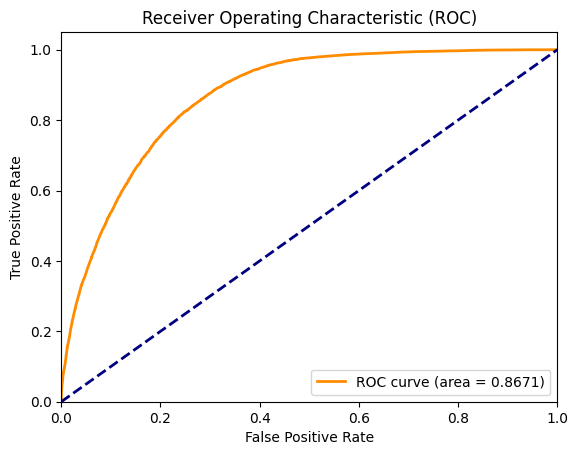

In [10]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

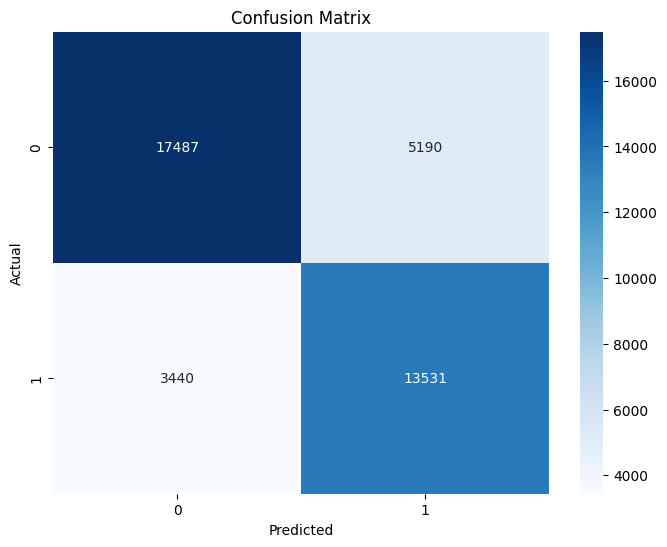

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

selected_features = X.columns[(lasso.coef_ != 0)]

rf = RandomForestClassifier(random_state=42, bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=300)
rf.fit(X_train[selected_features], y_train)

y_pred = rf.predict(X_test[selected_features])
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Random Forest with Selected Features")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Random Forest with Selected Features
Accuracy: 0.7809725585149314
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80     22677
           1       0.72      0.79      0.76     16971

    accuracy                           0.78     39648
   macro avg       0.78      0.78      0.78     39648
weighted avg       0.79      0.78      0.78     39648



Lasso doesn't work well.